In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [3]:

import matplotlib.pyplot as plt

In [4]:
Model_Name = 'bugfix1_2'

In [5]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [6]:
val_ds = load_valset('val_image',10)

In [7]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [8]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:773.0877177715302


In [9]:
print(predict_batch.shape)

(32, 100, 100)


In [15]:
import numpy as np

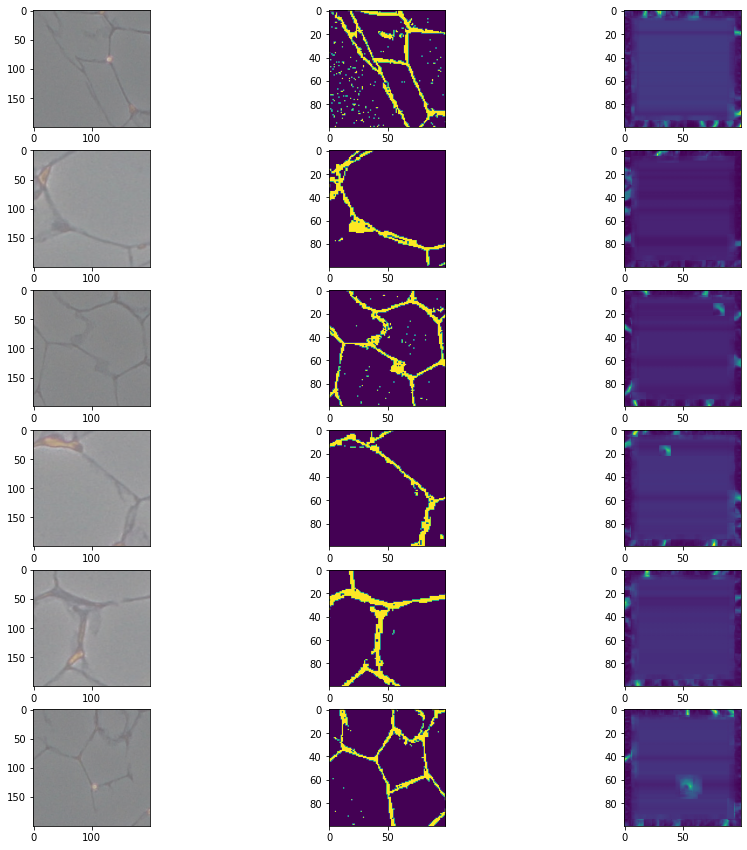

In [18]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask)
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred)
    i += 3
plt.show()